 - Add manual input to data sources
 - Add a graph to show how easy
 - Add an example of using an external dev function
 - Add an example of running a calculation and adding it as a column instantly

# Jupyter-based interactive computing

 - One-window experience, by most part
 - Folder structure for artifacts/programs
 - Both code and widgets interactions are available in the same place
 - Complex functionality available by utilizing frameworks

## Use Cases in mind

![Use Cases](UseCases.png "Use Cases")

## Components Structure

![Components](Components.png "Components Layout")

## In this demonstration

 - Read a datafeed into a dataframe
 - Perform Basic data cleaning routines
 - Export clean data to HTML and CSV
 - Diff between datasets
 - Construction of custom datasets programatically
 - Constrcuction of custom datasets with UI widgets
 - Saving of custom datasets into CSV

## Setup environment

The vision is to build templates covering key data manipulation routines - this way users only need to open a template to get going - they will be able to modify it as they go and save the changes

In [38]:
import pandas as pd, numpy as np, ipywidgets as widgets, sys
sys.path.append('/srv/Citi/jupyter-samples/dev')
pd.options.display.max_columns = 50
feed_file = 'LoanStats3a.csv'

## Importing data from a feed

We are using `pandas` framework (popular for data science) for data manipulations. It's fairly easy to learn and very performant. 

In [47]:
data = pd.read_csv(feed_file, low_memory=False)
data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

 - Let's remove empty columns
 - Let's remove leaning and trailing spaces ' 36 month ' will become '36 months'

In [26]:
data = data.dropna(1, how='all')
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,1,...,5000.00,863.16,0.0,0.0,0.00,Jan-2015,171.62,Feb-2018,0,1,Individual,0,0,0,0,0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-1999,5,...,456.46,435.17,0.0,122.9,1.11,Apr-2013,119.66,Oct-2016,0,1,Individual,0,0,0,0,0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Stripping spaces is a simple function:

In [27]:
def StripSpaces(df):
    cols = df.select_dtypes([np.object_]).columns
    for c in cols:
        df[c] = df[c].str.strip()
    return df

data = StripSpaces(data)
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,Borrower added on 12/22/11 > I need to upgrade...,credit_card,Computer,860xx,AZ,27.65,0,Jan-1985,1,...,5000.00,863.16,0.0,0.0,0.00,Jan-2015,171.62,Feb-2018,0,1,Individual,0,0,0,0,0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,Borrower added on 12/22/11 > I plan to use thi...,car,bike,309xx,GA,1.00,0,Apr-1999,5,...,456.46,435.17,0.0,122.9,1.11,Apr-2013,119.66,Oct-2016,0,1,Individual,0,0,0,0,0,N,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Data Plotting is simple

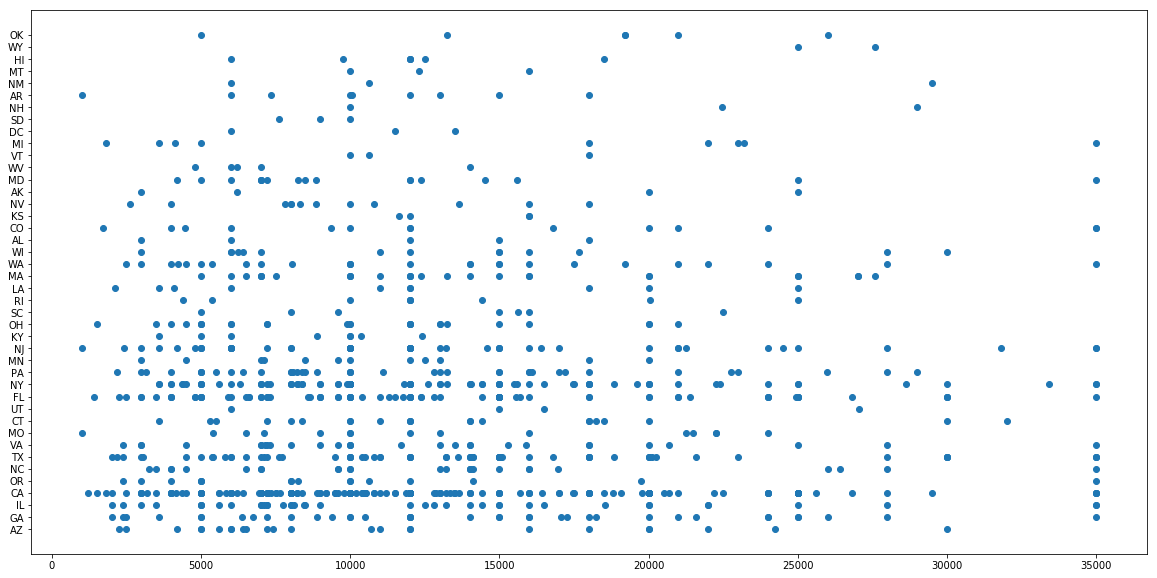

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.scatter(data['loan_amnt'], data['addr_state']);

## Saving clean data to files

 - CSV
 - HTML
 - There are many other formats available, including SQL, local database files and specific framework formats, too

In [28]:
name = "LoanStat3a-Cleaned"
with open(name+'.html', 'w') as f:
    f.write(data.head(100).to_html())

data.head(100).to_csv(name+'.csv')

## Constructing custom sets

 - Let's pick three columns from original feed and make a custom dataframe out of it
 - Let's inspect the frame

In [29]:
data_small = data[['issue_d','term','int_rate','funded_amnt']].head(10)
data_small['term'] = data_small['term'].str.strip()
data_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
issue_d        10 non-null object
term           10 non-null object
int_rate       10 non-null object
funded_amnt    10 non-null int64
dtypes: int64(1), object(3)
memory usage: 400.0+ bytes


In [57]:
data_small

,issue_d,term,int_rate,funded_amnt
0,Dec-2011,36 months,10.65%,5000
1,Dec-2011,60 months,15.27%,2500
2,Dec-2011,36 months,15.96%,2400
3,Dec-2011,36 months,13.49%,10000
4,Dec-2011,60 months,12.69%,3000
5,Dec-2011,36 months,7.90%,5000
6,Dec-2011,60 months,15.96%,7000
7,Dec-2011,36 months,18.64%,3000
8,Dec-2011,60 months,21.28%,5600
9,Dec-2011,60 months,12.69%,5375


## Generating columns and applying functions is easy

Let's create a simple function and apply it's calculation over `funded_amnt` column in a new column

In [61]:
def DoubleMe(x):
    return x*3

datax = data_small.copy()
datax['calculated_value'] = datax['funded_amnt'].apply(DoubleMe)
datax

,issue_d,term,int_rate,funded_amnt,calculated_value
0,Dec-2011,36 months,10.65%,5000,15000
1,Dec-2011,60 months,15.27%,2500,7500
2,Dec-2011,36 months,15.96%,2400,7200
3,Dec-2011,36 months,13.49%,10000,30000
4,Dec-2011,60 months,12.69%,3000,9000
5,Dec-2011,36 months,7.90%,5000,15000
6,Dec-2011,60 months,15.96%,7000,21000
7,Dec-2011,36 months,18.64%,3000,9000
8,Dec-2011,60 months,21.28%,5600,16800
9,Dec-2011,60 months,12.69%,5375,16125


## Data diffs

In this sample, we will use the newly created custom set and modify one to be different and build a small widget that will display columns side by side and highlight differences.

In [30]:
data_small1 = data_small.copy()
data_small1['funded_amnt'] = data_small1['funded_amnt'] * 1.2
data_small1.loc[data_small1['term'] == '36 months', 'int_rate'] = '10.10%'

In [31]:
data_both=pd.concat([data_small, data_small1], axis='columns', keys=['Original', 'Updated'])
data_swapped=data_both.swaplevel(axis='columns')[data_small.columns[1:]]
def highlight_diff(data, color='yellow'):
    attr = 'background-color: {}'.format(color)
    other = data.xs('Original', axis='columns', level=-1)
    return pd.DataFrame(np.where(data.ne(other, level=0), attr, ''),
                        index=data.index, columns=data.columns)

data_swapped.style.apply(highlight_diff, axis=None)

## Data building with widgets

In this example, we are buidling a simple widget that will let us do the following:

 - Select a data feed to read
 - Select columns we want to retain in new feed
 - Override the names for the selected columns
 - Select data types for the columns
 - Save the new set into CSV

In [18]:
def dTypeToType(t):
    """Takes pandas dtype (dataframe['column_name'].dtype.kind) as input and returns its python type representation"""
    return{
        'b':'boolean',
        'i':'(signed) integer',
        'u':'unsigned integer',
        'f':'floating-point',
        'c':'complex-floating point',
        'O':'(Python) objects',
        'S':'(byte-)string',
        'a':'(byte-)string',
        'U':'Unicode',
        'V':'raw data (void)',
    }[t]  

def dTypesAll():
    return ['float','int','bool','datetime64[ns]','datetime64[ns, tz]','timedelta[ns]','category','object']

In [23]:

def render_mapper():
    import os
    from IPython.lib.pretty import pretty

    # Layouts for formatting
    layout180 = widgets.Layout(width='180px', height='25px')
    layout260 = widgets.Layout(width='260px', height='25px')
    layout999 = widgets.Layout(width='999px', height='260px', display='block', overflow_y='auto')
    layout1 = widgets.Layout(flex='0 0 28px', min_height='28px', overflow_y='hidden')

    debug_view = widgets.Output(layout={'border': '1px solid black'})
    # Dropdown for input file
    files = [x for x in os.listdir() if '.csv' in x]

    files_dd = widgets.Dropdown(
        options=files,
        description='Select Feed File:',
        disabled=False,
    )

    upload_button = widgets.Button(description="Read file...")

    # Let's build the header rows
    header_row = widgets.HBox(children=[widgets.Label("Use in new set?", layout=layout260),
                                        widgets.Label("Rename in new set", layout=layout180),
                                        widgets.Label("Current Type", layout=layout260),
                                        widgets.Label("Convert to Type", layout=layout260)])

    text = widgets.Text(description='Set Name:')
    # Let's add a button and a onclick handler for it
    btn = widgets.Button(description="Generate Set")

    # Let's build the msg area for debug purposes
    msg = widgets.Textarea(layout=widgets.Layout(width='1020px', height='200px'))

    # Building the actual rows based on small_data set defined in cells above
    @debug_view.capture(clear_output=True)
    def get_columns(data_set):
        rows = []
        for x in data_set.columns:
            rows.append(widgets.HBox(children=[widgets.Checkbox(description=x, layout=layout260),
                                               widgets.Text(value=x, layout=layout180),
                                               widgets.Label(value=dTypeToType(data_set[x].dtype.kind),
                                                             layout=layout260),
                                               widgets.Dropdown(options=dTypesAll(), layout=layout260)
                                               ], layout=layout1))
        ui.children = rows

    @debug_view.capture(clear_output=True)
    def read_file(b):
        global input_set
        global data
        input_set = pd.read_csv(files_dd.value)
        msg.value = pretty(input_set.columns)
        get_columns(input_set)
        # msg.value = pretty(ui.children)

    @debug_view.capture(clear_output=True)
    def generate_set(b):
        old_columns = []
        new_columns = []
        for x in ui.children:
            if x.children[0].value:
                old_columns.append(x.children[0].description)
                new_columns.append(x.children[1].value)
        new_set = input_set[old_columns]
        new_set.columns = new_columns
        msg.value = pretty(str(new_set.columns) + str(new_set.size))
        new_set.to_csv(text.value+'.csv', index=False)

    upload_button.on_click(read_file)
    btn.on_click(generate_set)

    top_row = widgets.VBox(children=[widgets.HBox(children=[files_dd, upload_button])])
    ui = widgets.VBox()
    
    control = widgets.VBox(children=[top_row])
    data = widgets.VBox(children=[header_row, ui], layout=layout999)
    footer_row = widgets.VBox(children=[widgets.HBox(children=[text, btn]), msg, debug_view])

    display(control)
    display(data)
    display(footer_row)



In [48]:
render_mapper()

## Use external functions

In this demonstration we will show how to use external (dev-submitted) functions

In [42]:
%%sh
ls ../dev

BusinessMath.py
__init__.py
__pycache__


In [43]:
import BusinessMath

In [45]:
%%sh
cat ../dev/BusinessMath.py

def LossModel(a, b):
    return a-b

In [44]:
BusinessMath.LossModel(10,4)

6